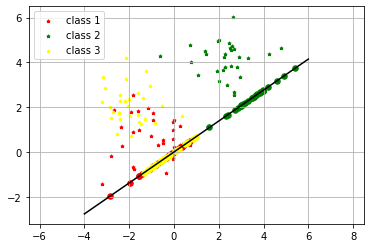

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# funkcja rzutująca punkty na linie o kierunku a
def rzutowanie(X,a):
    x_tmp = (X[1] * a + X[0]) / (a ** 2 + 1)
    y_tmp = a * x_tmp   
    return np.array([x_tmp,y_tmp])

# macierz kowiarancji
cov = np.array([[1,0],[0,1]])

# średnia w klasie 1
mean_1 = np.array([-1,1])
# losowanie 30 punktów z rozkładu normalnego o średniej mean_1 i macierzy kowariancji cov
c1 = np.random.multivariate_normal(mean_1, cov, 30).T
n1 = np.size(c1[0])

mean_2 = np.array([2,4])
c2 = np.random.multivariate_normal(mean_2, cov, 30).T
n2 = np.size(c2[0])

mean_3 = np.array([-2,2])
c3 = np.random.multivariate_normal(mean_3, cov, 30).T
n3 = np.size(c3[0])

# Ogólna liczność oraz liczba klas
n = n1 + n2 + n3
g = 3

# wyznaczanie średniej dla wszystkich punktów
sumx = c1 + c2 + c3
tmp = np.mean((c1,c2,c3),axis = 0)
mean = np.array([np.mean(tmp[0]),np.mean(tmp[1])])

# Macierz zmienności międzygrupowej
B = (np.outer((n1 * (mean_1 - mean)) , (mean_1 - mean).transpose()) + np.outer((n2 * (mean_2 - mean)) , (mean_2 - mean).transpose())
+ np.outer((n3 * (mean_3 - mean)) , (mean_3 - mean).transpose())) / (g - 1)

# Macierz zmienności wewnątrzgrupowej
W = 1 / (n - g) * ((n1 - 1) * cov + (n2 - 1) * cov + (n3 - 1) * cov)

# Macierz pomocnicza
W_rev = np.linalg.inv(W)
U = np.dot(W_rev,B)

# wartosci i wektory własne
w, v= np.linalg.eig(U)

# rysowanie linii o kierunku a 
x = np.linspace(-4,6)
a = v[1][0]/v[1][1]
y = a * x
plt.plot(x,y,"r",color="black")

# rysowanie punktów
plt.scatter(c1[0],c1[1], color='red', s = 10 ,label="class 1", marker = "*")
plt.scatter(c2[0], c2[1], color='green', s = 10 ,label="class 2", marker = "*")
plt.scatter(c3[0], c3[1], color='yellow', s = 10 ,label="class 3", marker = "*")

# rysowanie zrzutowanych punktów 
D1 = rzutowanie(c1, a)
plt.scatter(D1[0],D1[1], color='red', s = 30, marker = "o")

D2 = rzutowanie(c2, a)
plt.scatter(D2[0],D2[1], color='green', s = 30, marker = "o")

D3 = rzutowanie(c3, a)
plt.scatter(D3[0],D3[1], color='yellow', s = 30, marker = "o")

plt.axis('equal')
plt.grid()
plt.legend()
plt.show()
